Remove rows with success=0 in the OpenFace result

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

%matplotlib inline
plt.style.use("ggplot")

In [ ]:
# Read Data
emotion_category = 'group'
location = "/content/drive/MyDrive/05_workspace/01_msc_project/data/output/07_openface_result_merged/" + emotion_category + "/all_videos_emotion_merged.csv"
df = pd.read_csv(location)
df.head()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,filename,emotion,videoname
0,1,0,0.00,0.98,1,0.252709,0.591373,-0.765778,-0.010047,0.506404,-0.862238,0.148,0.593,618.2,621.8,627.1,631.2,631.5,628.0,622.5,618.5,611.1,615.5,620.3,625.4,630.0,633.2,635.1,631.9,627.8,622.9,618.3,614.2,621.7,623.6,626.0,627.6,627.5,625.6,623.2,...,-0.006,0.041,0.01,0.0,0.0,0.0,0.0,0.71,0.46,0.37,1.15,1.75,0.58,0.0,0.96,0.0,0.49,0.77,2.34,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01
1,2,0,0.04,0.98,1,0.273988,0.652730,-0.706310,-0.046856,0.572899,-0.818286,0.148,0.677,622.1,625.0,629.6,633.2,633.7,630.9,626.2,622.6,614.1,618.3,622.9,627.8,632.1,634.9,636.6,634.5,631.3,626.9,622.3,617.9,625.2,626.8,628.8,630.0,629.8,628.2,626.3,...,-0.027,0.153,0.00,0.0,0.0,0.0,0.0,0.20,0.33,0.27,1.10,1.94,0.50,0.0,0.98,0.0,0.65,0.61,2.71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01
2,3,0,0.08,0.98,1,0.292067,0.650612,-0.701000,-0.000686,0.551724,-0.834027,0.188,0.664,625.4,628.3,632.9,636.5,636.9,634.1,629.4,625.8,617.0,621.3,626.0,631.0,635.2,638.0,639.6,637.5,634.2,629.8,625.2,620.8,628.4,630.0,632.0,633.2,633.0,631.5,629.5,...,-0.169,0.202,0.00,0.0,0.0,0.0,0.0,0.41,0.50,0.00,0.84,1.38,0.69,0.0,0.61,0.0,0.57,1.37,2.53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01
3,4,0,0.12,0.98,1,0.159617,0.636737,-0.754380,0.007566,0.534840,-0.844920,0.104,0.632,626.8,629.9,635.1,639.3,640.1,637.1,631.7,627.5,620.8,624.9,629.5,634.5,639.2,642.6,644.8,641.9,638.0,633.1,628.4,624.3,630.6,632.5,634.8,636.2,635.9,634.0,631.7,...,-0.156,0.189,0.00,0.0,0.0,0.0,0.0,0.94,0.40,0.00,0.91,1.36,0.45,0.0,1.17,0.0,0.66,1.48,2.34,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01
4,5,0,0.16,0.98,1,0.134459,0.630543,-0.764419,0.032191,0.521385,-0.852714,0.103,0.619,629.9,633.1,638.5,642.8,643.6,640.5,634.9,630.6,623.8,628.2,633.1,638.5,643.4,646.8,649.0,646.0,641.9,636.8,631.9,627.4,633.9,635.8,638.1,639.6,639.2,637.3,635.0,...,-0.159,0.146,0.00,0.0,0.0,0.0,0.0,0.85,0.40,0.00,0.67,0.96,0.18,0.0,0.99,0.0,0.50,1.46,2.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01


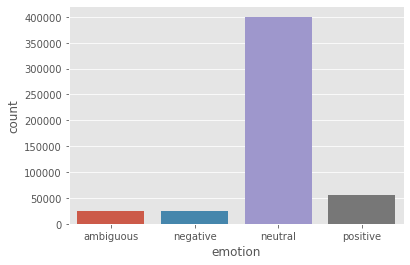

In [ ]:
# EDA and Preprocessing
# Class Distribution
sns.countplot(x = 'emotion', data=df)

In [ ]:
df.isnull().sum()

frame         0
face_id       0
timestamp     0
confidence    0
success       0
             ..
AU28_c        0
AU45_c        0
filename      0
emotion       0
videoname     0
Length: 717, dtype: int64

In [ ]:
df.shape

(504511, 717)

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.shape


(504511, 717)

In [ ]:
# Handling of confidence and success
df['confidence'].mean()

0.7706699556594103

In [ ]:
df_temp1 = df[['confidence', 'success']]

success is 1 : 392909
success is 0 : 111602


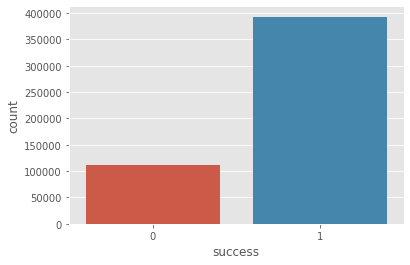

In [ ]:
print('success is 1 :', (df_temp1['success'] == 1).sum())
print('success is 0 :', (df_temp1['success'] == 0).sum())
sns.countplot(x = 'success', data=df_temp1)

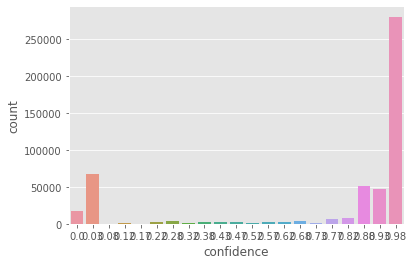

In [ ]:
sns.countplot(x = 'confidence', data=df_temp1)

In [ ]:
#Get the Index that matches the criteria
drop_index = df.index[df['success'] == 0]

In [ ]:
#Remove indexes that match the criteria
df = df.drop(drop_index)
df.head()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,filename,emotion,videoname
0,1,0,0.00,0.98,1,0.252709,0.591373,-0.765778,-0.010047,0.506404,-0.862238,0.148,0.593,618.2,621.8,627.1,631.2,631.5,628.0,622.5,618.5,611.1,615.5,620.3,625.4,630.0,633.2,635.1,631.9,627.8,622.9,618.3,614.2,621.7,623.6,626.0,627.6,627.5,625.6,623.2,...,-0.006,0.041,0.01,0.0,0.0,0.0,0.0,0.71,0.46,0.37,1.15,1.75,0.58,0.0,0.96,0.0,0.49,0.77,2.34,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01
1,2,0,0.04,0.98,1,0.273988,0.652730,-0.706310,-0.046856,0.572899,-0.818286,0.148,0.677,622.1,625.0,629.6,633.2,633.7,630.9,626.2,622.6,614.1,618.3,622.9,627.8,632.1,634.9,636.6,634.5,631.3,626.9,622.3,617.9,625.2,626.8,628.8,630.0,629.8,628.2,626.3,...,-0.027,0.153,0.00,0.0,0.0,0.0,0.0,0.20,0.33,0.27,1.10,1.94,0.50,0.0,0.98,0.0,0.65,0.61,2.71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01
2,3,0,0.08,0.98,1,0.292067,0.650612,-0.701000,-0.000686,0.551724,-0.834027,0.188,0.664,625.4,628.3,632.9,636.5,636.9,634.1,629.4,625.8,617.0,621.3,626.0,631.0,635.2,638.0,639.6,637.5,634.2,629.8,625.2,620.8,628.4,630.0,632.0,633.2,633.0,631.5,629.5,...,-0.169,0.202,0.00,0.0,0.0,0.0,0.0,0.41,0.50,0.00,0.84,1.38,0.69,0.0,0.61,0.0,0.57,1.37,2.53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01
3,4,0,0.12,0.98,1,0.159617,0.636737,-0.754380,0.007566,0.534840,-0.844920,0.104,0.632,626.8,629.9,635.1,639.3,640.1,637.1,631.7,627.5,620.8,624.9,629.5,634.5,639.2,642.6,644.8,641.9,638.0,633.1,628.4,624.3,630.6,632.5,634.8,636.2,635.9,634.0,631.7,...,-0.156,0.189,0.00,0.0,0.0,0.0,0.0,0.94,0.40,0.00,0.91,1.36,0.45,0.0,1.17,0.0,0.66,1.48,2.34,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01
4,5,0,0.16,0.98,1,0.134459,0.630543,-0.764419,0.032191,0.521385,-0.852714,0.103,0.619,629.9,633.1,638.5,642.8,643.6,640.5,634.9,630.6,623.8,628.2,633.1,638.5,643.4,646.8,649.0,646.0,641.9,636.8,631.9,627.4,633.9,635.8,638.1,639.6,639.2,637.3,635.0,...,-0.159,0.146,0.00,0.0,0.0,0.0,0.0,0.85,0.40,0.00,0.67,0.96,0.18,0.0,0.99,0.0,0.50,1.46,2.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video105.csv,ambiguous,video01


success is 1 : 392909
success is 0 : 0


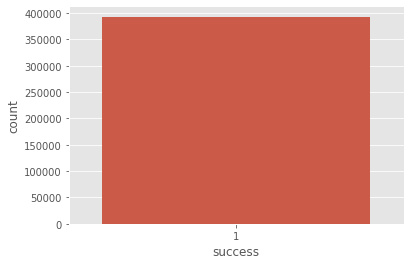

In [ ]:
df_temp2 = df[['confidence', 'success']]
print('success is 1 :', (df_temp2['success'] == 1).sum())
print('success is 0 :', (df_temp2['success'] == 0).sum())
sns.countplot(x = 'success', data=df_temp2)

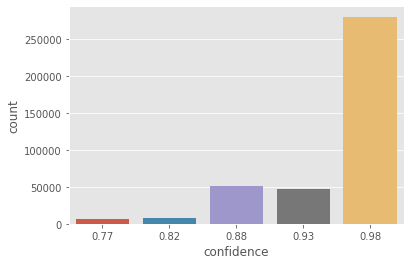

In [ ]:
sns.countplot(x = 'confidence', data=df_temp2)


In [ ]:
df[df['confidence'] == 0.77]

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,filename,emotion,videoname
93,19,0,0.720,0.77,1,0.379282,0.361089,-0.851916,0.227663,0.433430,-0.871956,0.339,0.432,604.3,604.3,605.6,607.3,608.5,608.6,607.2,605.5,602.3,603.1,604.4,606.0,607.7,609.1,610.2,609.5,608.2,606.7,605.1,603.6,606.0,606.8,607.3,607.3,606.8,606.0,605.5,...,0.005,0.001,0.03,0.00,0.00,1.63,0.35,0.00,0.01,0.93,0.42,2.53,0.00,0.78,0.02,0.00,0.00,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,output_video128.csv,ambiguous,video01
100,25,1,0.960,0.77,1,0.362370,0.304692,-0.880824,0.215209,0.313359,-0.924928,0.310,0.330,571.2,571.9,573.7,575.5,576.2,575.6,573.7,571.9,568.4,569.7,571.5,573.6,575.5,576.9,577.7,576.7,575.1,573.3,571.4,569.7,572.9,573.6,574.4,574.8,574.4,573.7,572.9,...,0.003,-0.006,0.48,0.00,0.11,0.13,0.47,0.91,0.00,0.00,0.08,0.72,0.33,0.00,0.96,0.00,0.13,0.00,0.26,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,output_video128.csv,ambiguous,video01
1417,50,0,1.960,0.77,1,0.219181,0.461118,-0.859843,-0.102083,0.337258,-0.935861,0.065,0.418,743.5,745.2,749.2,753.1,754.7,753.2,749.0,745.1,735.6,739.3,743.7,748.3,752.4,755.3,757.3,755.2,752.0,747.8,743.4,739.1,747.0,748.7,750.5,751.3,750.6,748.8,747.0,...,0.037,-0.214,1.18,0.00,0.00,0.00,1.67,2.07,0.00,0.18,1.25,0.00,0.92,1.01,0.47,0.00,1.56,0.00,1.11,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,output_video79.csv,ambiguous,video01
1470,66,1,2.600,0.77,1,0.642271,0.385078,-0.662723,0.406393,0.398034,-0.822444,0.615,0.485,286.3,289.5,302.2,316.8,324.8,322.5,308.8,294.3,265.1,273.8,285.7,300.8,315.9,327.3,336.4,329.0,317.2,302.8,288.6,275.9,300.1,306.6,312.3,313.8,310.2,303.6,298.0,...,-0.236,0.948,2.03,2.48,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,1.66,0.00,0.00,0.00,0.00,0.01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,output_video95.csv,ambiguous,video01
2234,99,0,3.920,0.77,1,0.426597,0.378919,-0.821241,0.280965,0.414682,-0.865504,0.397,0.440,586.8,587.2,588.5,590.0,590.9,590.6,589.1,587.6,584.7,585.6,587.0,588.6,590.2,591.4,592.2,591.4,590.2,588.8,587.3,585.8,588.3,588.9,589.5,589.7,589.3,588.6,588.1,...,-0.004,-0.005,0.00,0.00,0.00,1.70,0.00,0.36,0.00,0.19,0.23,0.77,0.12,0.00,0.02,0.00,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,output_video158.csv,negative,video01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502925,71,0,2.336,0.77,1,0.471740,0.340443,-0.813364,0.347797,0.340609,-0.873512,0.452,0.384,620.3,621.5,625.4,629.8,632.0,631.0,626.8,622.5,613.5,616.6,620.5,625.1,629.4,633.0,635.8,633.6,630.0,625.8,621.3,617.1,624.4,626.3,628.0,628.5,627.6,625.7,624.0,...,-0.265,0.157,0.46,0.36,1.22,1.06,0.10,0.00,0.42,0.08,0.00,4.65,1.14,1.06,0.00,0.26,0.42,1.60,0.80,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,output_video97.csv,neutral,video14
504071,62,0,2.035,0.77,1,0.437272,0.371790,-0.818881,0.306915,0.283169,-0.908635,0.407,0.362,719.8,720.2,724.1,729.1,732.4,732.1,728.1,72

In [ ]:
df['confidence'].mean()

0.9543827196612142

In [ ]:
output_location = '/content/drive/MyDrive/05_workspace/01_msc_project/data/output/08_data_pre_processing_for_openface/' + emotion_category + '/all_videos_emotion_merged_without_success0.csv'
df.to_csv(output_location, index=False)